# Portfolio Analysis

Weights: (10000, 7), Returns: (10000,), Risks: (10000,), Sharpe Ratios: (10000,)

Optimal Portfolio Weights:
AAPL: 0.0876
AMZN: 0.2970
GOOG: 0.0018
META: 0.0718
MSFT: 0.0181
NVDA: 0.1123
TSLA: 0.4114
Expected Return: 1.42
Expected Risk: 0.53
Sharpe Ratio: 2.66

Top 5 Portfolios by Sharpe Ratio:
           Date                                            Weights    Return  \
2590 2020-01-02  [0.08763896517716013, 0.2969928111041619, 0.00...  1.418061   
3404 2020-01-02  [0.02904108678204395, 0.1330507151999083, 0.02...  1.512656   
9179 2020-01-02  [0.051135310702760804, 0.3720621759606569, 0.0...  1.350738   
7236 2020-01-02  [0.1529264842154273, 0.14859906938723638, 0.04...  1.419622   
8739 2020-01-02  [0.18767137998646718, 0.18377028820788374, 0.0...  1.379717   

          Risk  Sharpe Ratio  
2590  0.529356      2.659950  
3404  0.571435      2.629618  
9179  0.511218      2.622637  
7236  0.540616      2.607439  
8739  0.526031      2.603873  


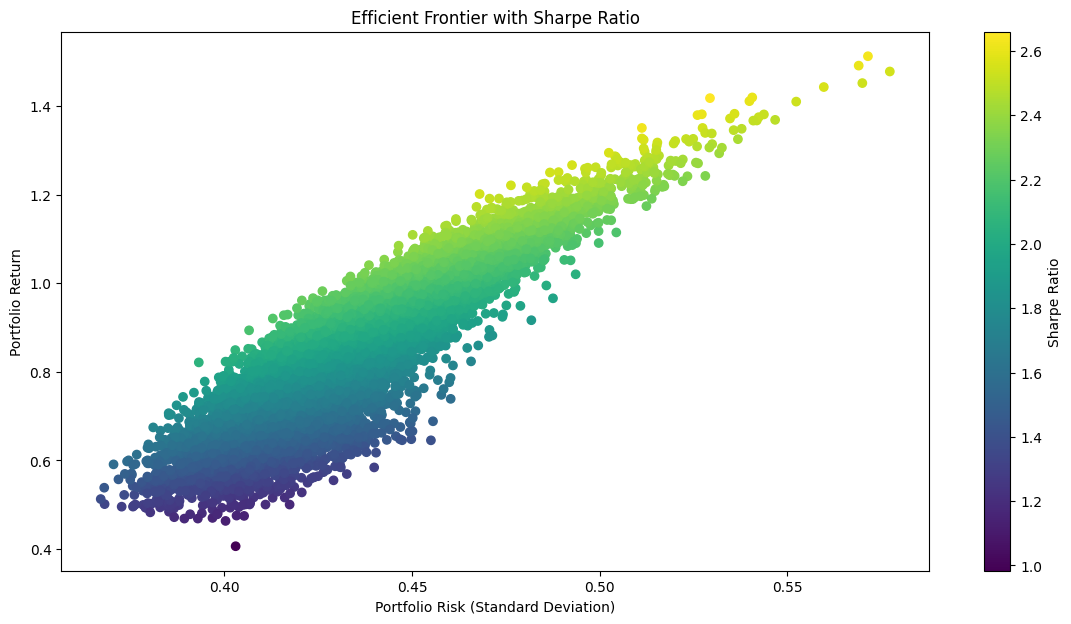

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define file paths for each asset
file_paths = {
    'AAPL': r'C:\Users\Toshiba\Desktop\Kifiya AIM 1\Week 1\Data\yfinance_data\yfinance_data\AAPL_historical_data.csv',
    'AMZN': r'C:\Users\Toshiba\Desktop\Kifiya AIM 1\Week 1\Data\yfinance_data\yfinance_data\AMZN_historical_data.csv',
    'GOOG': r'C:\Users\Toshiba\Desktop\Kifiya AIM 1\Week 1\Data\yfinance_data\yfinance_data\GOOG_historical_data.csv',
    'META': r'C:\Users\Toshiba\Desktop\Kifiya AIM 1\Week 1\Data\yfinance_data\yfinance_data\META_historical_data.csv',
    'MSFT': r'C:\Users\Toshiba\Desktop\Kifiya AIM 1\Week 1\Data\yfinance_data\yfinance_data\MSFT_historical_data.csv',
    'NVDA': r'C:\Users\Toshiba\Desktop\Kifiya AIM 1\Week 1\Data\yfinance_data\yfinance_data\NVDA_historical_data.csv',
    'TSLA': r'C:\Users\Toshiba\Desktop\Kifiya AIM 1\Week 1\Data\yfinance_data\yfinance_data\TSLA_historical_data.csv'
}

# Load historical data for all assets
data = {}
for asset, file_path in file_paths.items():
    try:
        df_asset = pd.read_csv(file_path, index_col='Date', parse_dates=True)
        data[asset] = df_asset['Adj Close']  # Use adjusted close prices
    except FileNotFoundError:
        print(f"File not found: {file_path}")

# Combine all data into a single DataFrame
df = pd.DataFrame(data)

# Filter data for the year 2020
df_2020 = df.loc['2020']

# Calculate daily returns
returns_2020 = df_2020.pct_change().dropna()

# Portfolio Simulation for Optimization
num_portfolios = 10000  # Number of random portfolios to simulate

# Initialize lists for portfolio metrics
portfolio_weights = []
portfolio_returns = []
portfolio_risks = []
portfolio_sharpe_ratios = []
portfolio_dates = []

# Number of assets
num_assets = len(returns_2020.columns)

# Generate random portfolios
for _ in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    portfolio_weights.append(weights)
    
    # Calculate expected portfolio return and risk
    portfolio_return = np.sum(weights * returns_2020.mean()) * 252  # Annualized return
    portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(returns_2020.cov() * 252, weights)))  # Annualized risk (volatility)
    risk_free_rate = 0.01  # Assume a risk-free rate of 1% for Sharpe Ratio calculation
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_risk
    
    # Append metrics
    portfolio_returns.append(portfolio_return)
    portfolio_risks.append(portfolio_risk)
    portfolio_sharpe_ratios.append(sharpe_ratio)
    
    # Assign a date based on index position
    portfolio_dates.append(df_2020.index[0])  # Using the first date for simplicity; adjust as needed

# Convert results to numpy arrays
portfolio_weights = np.array(portfolio_weights)
portfolio_returns = np.array(portfolio_returns)
portfolio_risks = np.array(portfolio_risks)
portfolio_sharpe_ratios = np.array(portfolio_sharpe_ratios)

# Create a DataFrame for portfolio results with dates
portfolio_results = pd.DataFrame({
    'Date': portfolio_dates,
    'Weights': [w for w in portfolio_weights],
    'Return': portfolio_returns,
    'Risk': portfolio_risks,
    'Sharpe Ratio': portfolio_sharpe_ratios
})

# Display the shape of the results
print(f"Weights: {portfolio_weights.shape}, Returns: {portfolio_returns.shape}, Risks: {portfolio_risks.shape}, Sharpe Ratios: {portfolio_sharpe_ratios.shape}")

# Find the portfolio with the maximum Sharpe Ratio
max_sharpe_idx = np.argmax(portfolio_sharpe_ratios)
optimal_weights = portfolio_weights[max_sharpe_idx]
optimal_return = portfolio_returns[max_sharpe_idx]
optimal_risk = portfolio_risks[max_sharpe_idx]
optimal_sharpe_ratio = portfolio_sharpe_ratios[max_sharpe_idx]

print("\nOptimal Portfolio Weights:")
for i, asset in enumerate(returns_2020.columns):
    print(f"{asset}: {optimal_weights[i]:.4f}")

print(f"Expected Return: {optimal_return:.2f}")
print(f"Expected Risk: {optimal_risk:.2f}")
print(f"Sharpe Ratio: {optimal_sharpe_ratio:.2f}")

# Display the top 5 portfolios
print("\nTop 5 Portfolios by Sharpe Ratio:")
print(portfolio_results.nlargest(5, 'Sharpe Ratio'))

# Optionally, save the results to a CSV file
portfolio_results.to_csv(r'C:\Users\Toshiba\Desktop\Kifiya AIM 1\Week 1\Data\portfolio_analysis_2020.csv', index=False)

# Visualize the Efficient Frontier with Sharpe Ratio
plt.figure(figsize=(14, 7))
plt.scatter(portfolio_risks, portfolio_returns, c=portfolio_sharpe_ratios, cmap='viridis', marker='o')
plt.title('Efficient Frontier with Sharpe Ratio')
plt.xlabel('Portfolio Risk (Standard Deviation)')
plt.ylabel('Portfolio Return')
plt.colorbar(label='Sharpe Ratio')
plt.show()
